In [22]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader
import torchvision.datasets as datasets
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

In [23]:
ecg = np.load("dataset/DREAMER/DREAMER_ecg.npy",allow_pickle=True)
label = np.load("dataset/DREAMER/DREAMER_label.npy",allow_pickle=True)
hrv = np.load("dataset/DREAMER/DREAMER_hrv.npy")

In [24]:
ecg

array([array([[ 0.05822637,  0.22547902],
              [-0.00867469,  0.34255587],
              [-0.05885048,  0.27565481],
              ...,
              [ 0.24220428, -0.41008104],
              [ 0.3258306 , -0.34317998],
              [ 0.35928113, -0.44353157]]),
       array([[ 0.13658757,  0.25482692],
              [-0.16745647, -0.08299979],
              [-0.16745647, -0.08299979],
              ...,
              [-0.08299979,  0.15347891],
              [-0.1336738 ,  0.1028049 ],
              [-0.11678246,  0.1028049 ]]),
       array([[-0.52928165, -0.39071282],
              [-0.45999723, -0.39071282],
              [-0.40803392, -0.42535502],
              ...,
              [-0.00964853, -0.13089626],
              [-0.04429074, -0.09625405],
              [-0.02696964, -0.14821736]]),
       array([[0.07419223, 0.00230402],
              [0.02027607, 0.00230402],
              [0.03824813, 0.05622018],
              ...,
              [0.18202454, 0.39768917],
  

In [25]:
label

array([array([4, 3, 2], dtype=uint8), array([3, 3, 1], dtype=uint8),
       array([5, 4, 4], dtype=uint8), array([4, 3, 2], dtype=uint8),
       array([4, 4, 4], dtype=uint8), array([1, 2, 5], dtype=uint8),
       array([5, 4, 4], dtype=uint8), array([1, 2, 4], dtype=uint8),
       array([1, 2, 3], dtype=uint8), array([5, 3, 4], dtype=uint8),
       array([4, 2, 3], dtype=uint8), array([4, 3, 4], dtype=uint8),
       array([4, 3, 2], dtype=uint8), array([3, 1, 2], dtype=uint8),
       array([2, 5, 5], dtype=uint8), array([3, 2, 2], dtype=uint8),
       array([1, 2, 5], dtype=uint8), array([3, 5, 5], dtype=uint8),
       array([3, 2, 2], dtype=uint8), array([2, 4, 3], dtype=uint8),
       array([5, 5, 4], dtype=uint8), array([1, 5, 4], dtype=uint8),
       array([2, 2, 2], dtype=uint8), array([2, 3, 3], dtype=uint8),
       array([4, 2, 2], dtype=uint8), array([2, 5, 4], dtype=uint8),
       array([2, 3, 3], dtype=uint8), array([1, 4, 4], dtype=uint8),
       array([4, 2, 2], dtype=uint

In [26]:
hrv

array([[0.73781309, 0.04228444, 0.74094858, 0.05737422],
       [0.76889205, 0.05710351, 0.77436756, 0.07881282],
       [0.77924749, 0.06274665, 0.78155048, 0.06969889],
       ...,
       [0.88932927, 0.05210834, 0.89142072, 0.06042719],
       [0.95950875, 0.06413424, 0.95909662, 0.06326378],
       [0.88216146, 0.07310807, 0.88202742, 0.07266187]])

In [27]:
ecg.shape,label.shape,hrv.shape

((414,), (414,), (414, 4))

In [28]:
y = torch.from_numpy(label[200])
y

tensor([5, 2, 3], dtype=torch.uint8)

In [29]:
x = torch.from_numpy(ecg[200])
x,len(x)

(tensor([[ 0.0733,  0.0213],
         [ 0.0473,  0.0213],
         [-0.1348, -0.1348],
         ...,
         [-0.7071, -0.4730],
         [-0.6030, -0.4730],
         [-0.6030, -0.4470]], dtype=torch.float64),
 89088)

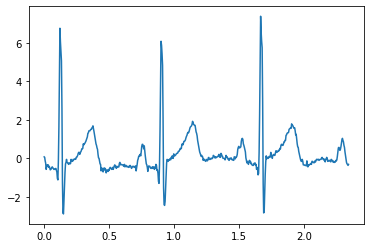

In [34]:
plt.plot(np.arange(x[:600,0].shape[0])/256,x[:600,0])

In [10]:
mse_sum = 0
p = 0
for i in range(100000):
    y = np.random.randint(1,6,size=3)
    y_hat = np.random.randint(1,6,size=3)
    mse = np.mean((y-y_hat)**2)
    mse_sum += mse
    if mse < 0.6:
        p += 1
mse_mean = mse_sum/100000
p /= 100000
mse_mean,p

(4.003143333334173, 0.0461)

In [11]:
import pandas as pd

In [12]:
data = pd.read_csv("2022_5_17_14_4.csv")
data

,标志,信号强度,版本号,心率,皮肤电,温度,IBI,x轴加速度,y轴加速度,z轴加速度,步数
1,0,0,0,0,0,0,0,0,0,0,NaN
2,58,145,173,1832,26,3019,139,67,205,0,NaN
3,64,145,154,1832,26,834,79,74,51,0,NaN
4,61,144,143,1832,26,594,180,72,51,0,NaN
5,60,146,143,1837,26,594,201,77,59,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
111,75,143,81,1448,29,735,210,78,76,0,NaN
112,73,142,82,1447,29,702,209,94,75,0,NaN
113,72,140,82,1436,29,684,210,104,75,0,NaN
114,70,144,82,1446,29,684,210,105,76,0,NaN


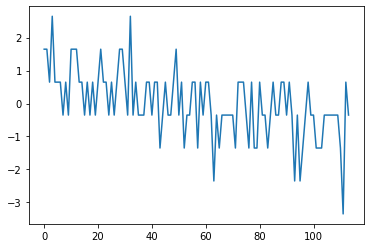

In [21]:
d = np.array(data['信号强度'][1:])
d = (d-np.mean(d))/np.std(d)
plt.plot(np.arange(len(d)),d)

In [20]:
pd

array([ 1.64937665,  1.64937665,  0.64922273,  2.64953058,  0.64922273,
        0.64922273,  0.64922273, -0.3509312 ,  0.64922273, -0.3509312 ,
        1.64937665,  1.64937665,  1.64937665,  0.64922273,  0.64922273,
       -0.3509312 ,  0.64922273, -0.3509312 ,  0.64922273, -0.3509312 ,
        0.64922273,  1.64937665,  0.64922273,  0.64922273, -0.3509312 ,
        0.64922273, -0.3509312 ,  0.64922273,  1.64937665,  1.64937665,
        0.64922273, -0.3509312 ,  2.64953058, -0.3509312 ,  0.64922273,
       -0.3509312 , -0.3509312 , -0.3509312 ,  0.64922273,  0.64922273,
       -0.3509312 ,  0.64922273,  0.64922273, -1.35108513, -0.3509312 ,
        0.64922273, -0.3509312 , -0.3509312 ,  0.64922273,  1.64937665,
       -0.3509312 ,  0.64922273, -1.35108513, -0.3509312 , -0.3509312 ,
        0.64922273,  0.64922273, -1.35108513,  0.64922273, -0.3509312 ,
        0.64922273,  0.64922273, -0.3509312 , -2.35123906, -0.3509312 ,
       -1.35108513, -0.3509312 , -0.3509312 , -0.3509312 , -0.35